# PROJECT DESCRIPTION

**Preamble**

An important general concern all over the African continent has been the sub-par quality of elementary and secondary education which has been further highlighted by the recent push to Computer-Based tests for students in ultimate classes (especially SSS3). In fairness, there has been some action taken by CSOs, governments and other bodies to improve the quality of education, and by extension, students’ performance. 
 
Recent statistics from JAMB (a Nigerian pre-tertiary examination governing body) shows that **76% (approx. 4 out of 5)** of students who participated in the **2024 UTME scored less than 200 (50%)**. This interesting insight emphasizes the need to find proactive solutions to this problem. 

**Requirement**

You and your team have been contracted as consultants by a school somewhere in Africa (feel free to take any country or location of your choice) to help them build a solution that proactively leverages data to improve candidates’ performance in not just JAMB, but all their upcoming final exams.

With students set to write JAMB and WASSCE again soon, you’ve been given a goal to ensure that an overwhelming majority of candidates score above average in their performance. 
How do we use data to ensure the students have great performance in the exams. 



# PROJECT OBJECTIVE

- Identify possible problems students might be facing while writing these exams  bearing in mind that this would involve starting from the scratch as most schools do not have the foundational data infrastructure to solve this problem.  
- Generate your data through any means based on the needs of your solution while ensuring that your data adequately reflects the state of the African education ecosystem
- Design an enterprise data solution for the school’s data collection, pipelining, warehousing, automation and reporting needs.
- Create an optimised model that predicts the likelihood of a student passing or failing their upcoming exam based on their academic history. Consider all factors that could affect a student's upcoming result aside from their previous exam scores.
- Make relevant recommendations to the Stakeholders on how they can help improve the performance of the students based on your solution

**Scope**
1. Data Collection: Develop methods to collect various types of data
2. Data Structuring: Create a database schema to store the collected data efficiently.
3. Data Analysis: Use data analytics techniques to identify key factors affecting student performance.
4. Model Development
5. Reporting and Visualization

**Points to Note:**
-  Ensure your solution fits into the African secondary educational ecosystem
- There should be a minimum of 50 students in a class of students.
- The data warehouse should be designed for the entire school and should cover all activities within the school. It should not be limited to just exam result related information
Note: It should solve the school’s data collection problem.

# "PROJECT BEGINS"

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Corrected import statements for imbalanced-learn (assuming you meant imbalanced-learn)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Corrected import statement for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Corrected import statement for SVC (assuming you meant Support Vector Classifier)
from sklearn.svm import SVC

# Additional correction: Removed duplicate import of RandomForestClassifier and ConfusionMatrixDisplay


# Loading Dataset

In [2]:
df = pd.read_excel("Thomas_More_Machrina_school_data_.xlsx")

The code above is used to read our Dataset into Jupyter notebook for further process. The Dataset now has a variable name known as df. So we can refer to our Data by just calling the df in our jupyter notebook.

In [3]:
df

,Student_ID,Student_Name,Gender,Country,District,Region,Location,Age,Gender_Orientation,School_Type,...,4_History,4_Fine Arts,4_Music,4_Drama,4_ICT,4_French,4_Arabic,4_Literature in English,Final_Grade_4,CSEE_Result
0,S001,Student_1,F,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Girls,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Fail
1,S002,Student_2,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Girls,Day,...,C,A,A,C,C,A,A,F,Fail,Pass
2,S003,Student_3,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Pass
3,S004,Student_4,F,Tanzania,KINONDONI,Dar es Salaam,Urban,16,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Pass
4,S005,Student_5,F,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,S133,Student_133,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Pass
133,S134,Student_134,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Mixed,Day,...,D,A,B,A,C,F,C,A,Pass,Pass
134,S135,Student_135,F,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Boys,Day,...,A,C,B,A,C,B,F,D,Fail,Fail
135,S136,Student_136,M,Tanzania,KINONDONI,Dar es Salaam,Urban,17,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Pass


The variable name df which refers to the Dataset name as seen above provides an overview of the Dataset. It shows the total observation and features in the Data sets. We have 137 observations and 157 feautures in this Dataset.

##  Data Inspection

In [4]:
# Display first few rows to inspect structure
df.head()

,Student_ID,Student_Name,Gender,Country,District,Region,Location,Age,Gender_Orientation,School_Type,...,4_History,4_Fine Arts,4_Music,4_Drama,4_ICT,4_French,4_Arabic,4_Literature in English,Final_Grade_4,CSEE_Result
0,S001,Student_1,F,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Girls,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Fail
1,S002,Student_2,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Girls,Day,...,C,A,A,C,C,A,A,F,Fail,Pass
2,S003,Student_3,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Pass
3,S004,Student_4,F,Tanzania,KINONDONI,Dar es Salaam,Urban,16,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Pass
4,S005,Student_5,F,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Fail


The code above df.head() gives an overview of the the first 5 Dataset from the top if the numbers to display are not stated. This helps to understand the Dataset very well and check for abnomalies.

In [5]:
# Display last few rows to inspect structure
df.tail()

,Student_ID,Student_Name,Gender,Country,District,Region,Location,Age,Gender_Orientation,School_Type,...,4_History,4_Fine Arts,4_Music,4_Drama,4_ICT,4_French,4_Arabic,4_Literature in English,Final_Grade_4,CSEE_Result
132,S133,Student_133,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Pass
133,S134,Student_134,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Mixed,Day,...,D,A,B,A,C,F,C,A,Pass,Pass
134,S135,Student_135,F,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Boys,Day,...,A,C,B,A,C,B,F,D,Fail,Fail
135,S136,Student_136,M,Tanzania,KINONDONI,Dar es Salaam,Urban,17,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Pass
136,S137,Student_137,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Pass


The code above df.tail() gives an overview of the the last 5 Dataset if the numbers to display are not stated. This helps to understand the Dataset very well and check for abnomalies.

In [6]:
df.shape

(137, 157)

The code above df.shape talks about the shape of the Dataset with its respective rows and columns.As mentioned earlier, we have 137 observations aand 157 features in our Dataset.

In [7]:
import pandas as pd

# Set Pandas display options to show all columns
pd.set_option('display.max_info_columns', 160)  # Set to a number larger than or equal to your number of columns
pd.set_option('display.width', 1000)            # Increase the display width to avoid wrapping

# Display detailed information about the DataFrame
df.info(verbose=True, memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 157 columns):
 #    Column                                Non-Null Count  Dtype  
---   ------                                --------------  -----  
 0    Student_ID                            137 non-null    object 
 1    Student_Name                          137 non-null    object 
 2    Gender                                137 non-null    object 
 3    Country                               137 non-null    object 
 4    District                              137 non-null    object 
 5    Region                                137 non-null    object 
 6    Location                              137 non-null    object 
 7    Age                                   137 non-null    int64  
 8    Gender_Orientation                    137 non-null    object 
 9    School_Type                           137 non-null    object 
 10   School_Name                           137 non-null    object 
 11   Scho

The code above df.info() gives a first hand information of the Dataset in their respective Data Structure format including other details as well as the features containing blanks.

In [8]:
pd.reset_option('display.max_info_columns')
pd.reset_option('display.width')


To revert the display settings back to their default values after inspecting the DataFrame, you can reset the options using the above code

In [9]:
# Display summary statistics
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student_ID,137,137,S001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Student_Name,137,137,Student_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,137,2,F,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,137,1,Tanzania,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District,137,1,KINONDONI,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4_French,43,5,F,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_Arabic,43,5,C,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_Literature in English,43,5,C,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final_Grade_4,137,2,Fail,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The code above df.describe(include="all").T describes the numerical Data as regarding their mean std, min. 25%, 50%, 75% and max values.

In [10]:
print(df.describe(include='all'))


       Student_ID Student_Name Gender   Country    District         Region  \
count         137          137    137       137         137            137   
unique        137          137      2         1           1              1   
top          S001    Student_1      F  Tanzania   KINONDONI  Dar es Salaam   
freq            1            1     81       137         137            137   
mean          NaN          NaN    NaN       NaN         NaN            NaN   
std           NaN          NaN    NaN       NaN         NaN            NaN   
min           NaN          NaN    NaN       NaN         NaN            NaN   
25%           NaN          NaN    NaN       NaN         NaN            NaN   
50%           NaN          NaN    NaN       NaN         NaN            NaN   
75%           NaN          NaN    NaN       NaN         NaN            NaN   
max           NaN          NaN    NaN       NaN         NaN            NaN   

       Location         Age Gender_Orientation School_Type  ...

You can use the .describe() method, which provides insights into numerical columns and statistical summaries of your DataFrame.

In [11]:
df.corr()

C:\Users\GBOLAHAN\AppData\Local\Temp\ipykernel_8376\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,School_Ranking,Assignment_metrics,Attendance,Hours_of_study,Closeness_to_teacher,Num_teachers,Extracurricular_classes_enrollment,Time_spent_in_class,Homework_pop_quizzes_regularity,Homework_pop_quizzes_completion_rate,Class_participation
Age,1.000000,NaN,-0.072350,-0.089779,-0.001506,0.016122,-0.011738,-0.109035,-0.175624,0.026185,-0.046885,-0.082796
School_Ranking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assignment_metrics,-0.072350,NaN,1.000000,0.219884,-0.053032,0.004232,-0.036546,-0.008283,0.049543,0.101995,-0.008507,0.015941
Attendance,-0.089779,NaN,0.219884,1.000000,-0.056529,-0.077669,-0.089987,-0.005905,-0.108118,-0.011993,-0.014741,-0.000978
Hours_of_study,-0.001506,NaN,-0.053032,-0.056529,1.000000,0.033304,-0.172037,0.158258,0.099430,0.069056,-0.069822,0.062402
Closeness_to_teacher,0.016122,NaN,0.004232,-0.077669,0.033304,1.000000,0.013361,-0.039152,-0.073964,-0.030756,-0.180962,-0.247151
Num_teachers,-0.011738,NaN,-0.036546,-0.089987,-0.172037,0.013361,1.000000,-0.010091,0.018469,-0.013951,-0.036432,-0.061500
Extracurricular_classes_enrollment,-0.109035,NaN,-0.008283,-0.005905,0.158258,-0.039152,-0.010091,1.000000,-0.005686,0.029149,-0.070972,0.058499
Time_spent_in_class,-0.175624,NaN,0.049543,-0.108118,0.099430,-0.073964,0.018469,-0.005686,1.000000,-0.099005,0.141537,0.096852
Homework_pop_quizzes_regularity,0.026185,NaN,0.101995,-0.011993,0.069056,-0.030756,-0.013951,0.029149,-0.099005,1.000000,0.079007,-0.157843


The code above shows the correlation between two numerical features. This tells us if there is any relationship between these features in our Dataset. The relatonship could be positive(closer to 1 or 1) or negative(closer to -1 0r -1) or independent(showing no relationship (0)).

In [12]:
df.sample(n=10)

,Student_ID,Student_Name,Gender,Country,District,Region,Location,Age,Gender_Orientation,School_Type,...,4_History,4_Fine Arts,4_Music,4_Drama,4_ICT,4_French,4_Arabic,4_Literature in English,Final_Grade_4,CSEE_Result
59,S060,Student_60,M,Tanzania,KINONDONI,Dar es Salaam,Urban,17,Mixed,Day,...,C,A,C,A,B,A,C,D,Pass,Pass
114,S115,Student_115,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Fail
55,S056,Student_56,F,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Pass
60,S061,Student_61,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Pass
91,S092,Student_92,F,Tanzania,KINONDONI,Dar es Salaam,Urban,17,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Pass
82,S083,Student_83,M,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Fail
16,S017,Student_17,F,Tanzania,KINONDONI,Dar es Salaam,Urban,17,Mixed,Day,...,A,F,B,F,D,B,C,A,Fail,Fail
109,S110,Student_110,F,Tanzania,KINONDONI,Dar es Salaam,Urban,17,Girls,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,Fail
34,S035,Student_35,M,Tanzania,KINONDONI,Dar es Salaam,Urban,16,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,Fail
52,S053,Student_53,F,Tanzania,KINONDONI,Dar es Salaam,Urban,16,Boys,Day,...,D,B,C,F,A,A,A,D,Fail,Fail


The code above df.sample() gives an overview of the Dataset sampling the Dataset at random. This helps to understand the Dataset very well and check for abnomalies.

In [13]:
df.columns

Index(['Student_ID', 'Student_Name', 'Gender', 'Country', 'District', 'Region',
       'Location', 'Age', 'Gender_Orientation', 'School_Type',
       ...
       '4_History', '4_Fine Arts', '4_Music', '4_Drama', '4_ICT', '4_French',
       '4_Arabic', '4_Literature in English', 'Final_Grade_4', 'CSEE_Result'],
      dtype='object', length=157)

In [14]:
df_data = df.copy()

In [15]:
df_data['CSEE_Result'] = df_data['CSEE_Result'].replace({'Pass': 1, 'Fail': 0})

In [16]:
df_data

,Student_ID,Student_Name,Gender,Country,District,Region,Location,Age,Gender_Orientation,School_Type,...,4_History,4_Fine Arts,4_Music,4_Drama,4_ICT,4_French,4_Arabic,4_Literature in English,Final_Grade_4,CSEE_Result
0,S001,Student_1,F,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Girls,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,0
1,S002,Student_2,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Girls,Day,...,C,A,A,C,C,A,A,F,Fail,1
2,S003,Student_3,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,1
3,S004,Student_4,F,Tanzania,KINONDONI,Dar es Salaam,Urban,16,Mixed,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,1
4,S005,Student_5,F,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,S133,Student_133,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,1
133,S134,Student_134,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Mixed,Day,...,D,A,B,A,C,F,C,A,Pass,1
134,S135,Student_135,F,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Boys,Day,...,A,C,B,A,C,B,F,D,Fail,0
135,S136,Student_136,M,Tanzania,KINONDONI,Dar es Salaam,Urban,17,Boys,Day,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,1


This returns all the respective columns in our Dataset

# Checking for Missing Values

In [17]:

pd.set_option('display.max_columns', 160)  # Ensure all columns are shown
pd.set_option('display.width', 1000)        # Adjust the display width

# Check for missing values in the DataFrame
missing_values = df_data.isna().sum()

# Display the result
print(missing_values)


Student_ID                  0
Student_Name                0
Gender                      0
Country                     0
District                    0
                           ..
4_French                   94
4_Arabic                   94
4_Literature in English    94
Final_Grade_4               0
CSEE_Result                 0
Length: 157, dtype: int64


The code above df.isna().sum() helps to check for missing values in our Dataset by summing all the blanks and Na's in the respective features we have. As we can see above, there are no missing values in our Dataset.

In [18]:
# Check for duplicate rows
print("Number of duplicate rows:", df_data.duplicated().sum())

Number of duplicate rows: 0


This code calculates and prints the number of duplicate rows in the DataFrame df.

In [19]:
course_columns = [col for col in df_data.columns if ('English' in col or 'Mathematics' in col or 'Kiswahili' in col or 
                                                 'Civics' in col or 'Biology' in col or 'Chemistry' in col or 
                                                 'Physics' in col or 'Geography' in col or 'Agriculture' in col or 
                                                 'Environmental Science' in col or 'Home Science' in col or 
                                                 'Technical Drawing' in col or 'Woodwork' in col or 
                                                 'Metalwork' in col or 'Commerce' in col or 'Accounting' in col or 
                                                 'Economics' in col or 'Government' in col or 'History' in col or 
                                                 'Fine Arts' in col or 'Music' in col or 'Drama' in col or 
                                                 'ICT' in col or 'French' in col or 'Arabic' in col or 
                                                 'Literature in English' in col)]

for course in course_columns:
    indicator_col = f"{course}_Taken"

### FEATURE ENGNEERING

In [20]:
df_1 = df_data.copy()

In [21]:
# Step 1: Create the intermediate 'course_Taken' columns
for course in course_columns:
    df_1[f"{course}_Taken"] = df_1[course].notnull().astype(int)

# Step 2: Calculate Total_Courses_Taken
df_1['Total_Courses_Taken'] = df_1[[f"{course}_Taken" for course in course_columns]].sum(axis=1)

# Step 3: Drop the intermediate 'course_Taken' columns
df_1.drop(columns=[f"{course}_Taken" for course in course_columns], inplace=True)

# Now df1 has only the 'Total_Courses_Taken' column and no intermediate columns

C:\Users\GBOLAHAN\AppData\Local\Temp\ipykernel_8376\650095107.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1[f"{course}_Taken"] = df_1[course].notnull().astype(int)
C:\Users\GBOLAHAN\AppData\Local\Temp\ipykernel_8376\650095107.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_1[f"{course}_Taken"] = df_1[course].notnull().astype(int)
C:\Users\GBOLAHAN\AppData\Local\Temp\ipykernel_8376\650095107.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [22]:
df_1

,Student_ID,Student_Name,Gender,Country,District,Region,Location,Age,Gender_Orientation,School_Type,School_Name,School_Ownership,School_Ranking,Equipped_Library,Equipped_Science_Lab,Equipped_ICT_Lab,Discipline,Behavioual_record,Access_to_textbooks,Active_extracurricular,Extracurricular_activities,Access_to_curriculum,Assignment_metrics,Attendance,Hours_of_study,Any_disability,Closeness_to_teacher,Num_teachers,Extracurricular_classes_enrollment,Sent_home_for_school,Lunch_provided_by_school,Availability_of_school_bus,Time_spent_in_class,Homework_pop_quizzes_regularity,Homework_pop_quizzes_completion_rate,Class_participation,Disciplinary_records,Blood_group,Disease_capture,Family_background,1_English,1_Mathematics,1_Kiswahili,1_Civics,1_Biology,1_Chemistry,1_Physics,1_Geography,1_Agriculture,1_Environmental Science,1_Home Science,1_Technical Drawing,1_Woodwork,1_Metalwork,1_Commerce,1_Accounting,1_Economics,1_Government,1_Biology.1,1_Geography.1,1_History,1_Fine Arts,1_Music,1_Drama,1_ICT,1_French,1_Arabic,1_Literature in English,Final_Grade_1,2_English,2_Mathematics,2_Kiswahili,2_Civics,2_Biology,2_Chemistry,2_Physics,2_Geography,2_Agriculture,2_Environmental Science,2_Home Science,2_Technical Drawing,2_Woodwork,2_Metalwork,2_Commerce,2_Accounting,2_Economics,2_Government,2_Biology.1,2_Geography.1,2_History,2_Fine Arts,2_Music,2_Drama,2_ICT,2_French,2_Arabic,2_Literature in English,Final_Grade_2,3_English,3_Mathematics,3_Kiswahili,3_Civics,3_Biology,3_Chemistry,3_Physics,3_Geography,3_Agriculture,3_Environmental Science,3_Home Science,3_Technical Drawing,3_Woodwork,3_Metalwork,3_Commerce,3_Accounting,3_Economics,3_Government,3_Biology.1,3_Geography.1,3_History,3_Fine Arts,3_Music,3_Drama,3_ICT,3_French,3_Arabic,3_Literature in English,Final_Grade_3,4_English,4_Mathematics,4_Kiswahili,4_Civics,4_Biology,4_Chemistry,4_Physics,4_Geography,4_Agriculture,4_Environmental Science,4_Home Science,4_Technical Drawing,4_Woodwork,4_Metalwork,4_Commerce,4_Accounting,4_Economics,4_Government,4_Biology.1,4_Geography.1,4_History,4_Fine Arts,4_Music,4_Drama,4_ICT,4_French,4_Arabic,4_Literature in English,Final_Grade_4,CSEE_Result,Total_Courses_Taken
0,S001,Student_1,F,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Girls,Day,THOMAS MORE MACHRINA SECONDARY SCHOOL,Public,11,Yes,No,Yes,Science,average,no,yes,sports,yes,76,0.842148,5,yes,10,1,3,yes,no,no,34,2,0.754047,0.543531,major,A+,asthma,two-parents,F,D,C,A,B,B,A,B,D,A,C,F,A,F,NaN,NaN,NaN,NaN,B,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,F,C,F,C,D,A,F,F,C,A,B,B,C,D,NaN,NaN,NaN,NaN,D,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,B,B,F,C,F,A,F,B,F,B,D,C,D,D,NaN,NaN,NaN,NaN,F,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,F,C,D,D,B,F,A,A,A,C,F,F,D,D,NaN,NaN,NaN,NaN,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,0,65
1,S002,Student_2,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Girls,Day,THOMAS MORE MACHRINA SECONDARY SCHOOL,Public,11,Yes,No,Yes,Art,average,no,no,none,yes,55,0.886932,9,no,8,1,3,yes,no,no,174,1,0.841370,0.991049,none,AB-,none,extended-family,B,F,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,B,B,F,D,B,D,B,Fail,D,F,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,A,F,F,B,D,B,F,Pass,A,D,F,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,D,B,A,A,A,F,A,Fail,D,F,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,A,A,C,C,A,A,F,Fail,1,49
2,S003,Student_3,M,Tanzania,KINONDONI,Dar es Salaam,Urban,14,Mixed,Day,THOMAS MORE MACHRINA SECONDARY SCHOOL,Public,11,Yes,No,Yes,Science,good,no,no,music,no,81,0.984522,0,no,4,12,5,no,no,no,80,3,0.835219,0.820394,minor,A-,none,single-parent,F,D,F,C,B,F,A,C,F,F,B,B,A,D,NaN,NaN,NaN,NaN,B,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,B,C,C,F,B,D,A,F,A,A,C,C,A,D,NaN,NaN,NaN,NaN,B,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,D,A,D,F,B,B,A,B,C,C,C,B,A,F,NaN,NaN,NaN,NaN,B,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,A,C,C,D,D,B,A,F,C,B,C,A,A,C,NaN,NaN,NaN,NaN,D,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail,1,65
3,S004,Student_4,F,Tanzania,

# Filling the missing Data

In [23]:
for course in course_columns:
    indicator_col = f"{course}_Taken"

# If grades are categorical (e.g., A, B, C, etc.)
df_1[course_columns] = df_1[course_columns].fillna('Not_Taken')

# If grades are numerical, choose an imputation value that doesn't overlap with actual grades
# For example, assuming grades are on a scale of 0-100
df_1[course_columns] = df_1[course_columns].fillna(-1)

In [24]:
df_1

,Student_ID,Student_Name,Gender,Country,District,Region,Location,Age,Gender_Orientation,School_Type,School_Name,School_Ownership,School_Ranking,Equipped_Library,Equipped_Science_Lab,Equipped_ICT_Lab,Discipline,Behavioual_record,Access_to_textbooks,Active_extracurricular,Extracurricular_activities,Access_to_curriculum,Assignment_metrics,Attendance,Hours_of_study,Any_disability,Closeness_to_teacher,Num_teachers,Extracurricular_classes_enrollment,Sent_home_for_school,Lunch_provided_by_school,Availability_of_school_bus,Time_spent_in_class,Homework_pop_quizzes_regularity,Homework_pop_quizzes_completion_rate,Class_participation,Disciplinary_records,Blood_group,Disease_capture,Family_background,1_English,1_Mathematics,1_Kiswahili,1_Civics,1_Biology,1_Chemistry,1_Physics,1_Geography,1_Agriculture,1_Environmental Science,1_Home Science,1_Technical Drawing,1_Woodwork,1_Metalwork,1_Commerce,1_Accounting,1_Economics,1_Government,1_Biology.1,1_Geography.1,1_History,1_Fine Arts,1_Music,1_Drama,1_ICT,1_French,1_Arabic,1_Literature in English,Final_Grade_1,2_English,2_Mathematics,2_Kiswahili,2_Civics,2_Biology,2_Chemistry,2_Physics,2_Geography,2_Agriculture,2_Environmental Science,2_Home Science,2_Technical Drawing,2_Woodwork,2_Metalwork,2_Commerce,2_Accounting,2_Economics,2_Government,2_Biology.1,2_Geography.1,2_History,2_Fine Arts,2_Music,2_Drama,2_ICT,2_French,2_Arabic,2_Literature in English,Final_Grade_2,3_English,3_Mathematics,3_Kiswahili,3_Civics,3_Biology,3_Chemistry,3_Physics,3_Geography,3_Agriculture,3_Environmental Science,3_Home Science,3_Technical Drawing,3_Woodwork,3_Metalwork,3_Commerce,3_Accounting,3_Economics,3_Government,3_Biology.1,3_Geography.1,3_History,3_Fine Arts,3_Music,3_Drama,3_ICT,3_French,3_Arabic,3_Literature in English,Final_Grade_3,4_English,4_Mathematics,4_Kiswahili,4_Civics,4_Biology,4_Chemistry,4_Physics,4_Geography,4_Agriculture,4_Environmental Science,4_Home Science,4_Technical Drawing,4_Woodwork,4_Metalwork,4_Commerce,4_Accounting,4_Economics,4_Government,4_Biology.1,4_Geography.1,4_History,4_Fine Arts,4_Music,4_Drama,4_ICT,4_French,4_Arabic,4_Literature in English,Final_Grade_4,CSEE_Result,Total_Courses_Taken
0,S001,Student_1,F,Tanzania,KINONDONI,Dar es Salaam,Urban,18,Girls,Day,THOMAS MORE MACHRINA SECONDARY SCHOOL,Public,11,Yes,No,Yes,Science,average,no,yes,sports,yes,76,0.842148,5,yes,10,1,3,yes,no,no,34,2,0.754047,0.543531,major,A+,asthma,two-parents,F,D,C,A,B,B,A,B,D,A,C,F,A,F,Not_Taken,Not_Taken,Not_Taken,Not_Taken,B,B,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Fail,F,C,F,C,D,A,F,F,C,A,B,B,C,D,Not_Taken,Not_Taken,Not_Taken,Not_Taken,D,F,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Pass,B,B,F,C,F,A,F,B,F,B,D,C,D,D,Not_Taken,Not_Taken,Not_Taken,Not_Taken,F,B,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Pass,F,C,D,D,B,F,A,A,A,C,F,F,D,D,Not_Taken,Not_Taken,Not_Taken,Not_Taken,B,A,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Fail,0,65
1,S002,Student_2,F,Tanzania,KINONDONI,Dar es Salaam,Urban,15,Girls,Day,THOMAS MORE MACHRINA SECONDARY SCHOOL,Public,11,Yes,No,Yes,Art,average,no,no,none,yes,55,0.886932,9,no,8,1,3,yes,no,no,174,1,0.841370,0.991049,none,AB-,none,extended-family,B,F,B,A,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,F,B,B,F,D,B,D,B,Fail,D,F,A,B,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,D,A,F,F,B,D,B,F,Pass,A,D,F,C,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,C,D,B,A,A,A,F,A,Fail,D,F,B,A,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken

### Dropping Irrelevant Columns

In [25]:
df_2 = df_1.copy()

In [26]:
df_2.drop(['Student_ID' ,'Student_Name', 'Country', 'District', 'Region'], axis=1, inplace=True)

In [27]:
df_2.sort_values('CSEE_Result', ascending = False).head()

,Gender,Location,Age,Gender_Orientation,School_Type,School_Name,School_Ownership,School_Ranking,Equipped_Library,Equipped_Science_Lab,Equipped_ICT_Lab,Discipline,Behavioual_record,Access_to_textbooks,Active_extracurricular,Extracurricular_activities,Access_to_curriculum,Assignment_metrics,Attendance,Hours_of_study,Any_disability,Closeness_to_teacher,Num_teachers,Extracurricular_classes_enrollment,Sent_home_for_school,Lunch_provided_by_school,Availability_of_school_bus,Time_spent_in_class,Homework_pop_quizzes_regularity,Homework_pop_quizzes_completion_rate,Class_participation,Disciplinary_records,Blood_group,Disease_capture,Family_background,1_English,1_Mathematics,1_Kiswahili,1_Civics,1_Biology,1_Chemistry,1_Physics,1_Geography,1_Agriculture,1_Environmental Science,1_Home Science,1_Technical Drawing,1_Woodwork,1_Metalwork,1_Commerce,1_Accounting,1_Economics,1_Government,1_Biology.1,1_Geography.1,1_History,1_Fine Arts,1_Music,1_Drama,1_ICT,1_French,1_Arabic,1_Literature in English,Final_Grade_1,2_English,2_Mathematics,2_Kiswahili,2_Civics,2_Biology,2_Chemistry,2_Physics,2_Geography,2_Agriculture,2_Environmental Science,2_Home Science,2_Technical Drawing,2_Woodwork,2_Metalwork,2_Commerce,2_Accounting,2_Economics,2_Government,2_Biology.1,2_Geography.1,2_History,2_Fine Arts,2_Music,2_Drama,2_ICT,2_French,2_Arabic,2_Literature in English,Final_Grade_2,3_English,3_Mathematics,3_Kiswahili,3_Civics,3_Biology,3_Chemistry,3_Physics,3_Geography,3_Agriculture,3_Environmental Science,3_Home Science,3_Technical Drawing,3_Woodwork,3_Metalwork,3_Commerce,3_Accounting,3_Economics,3_Government,3_Biology.1,3_Geography.1,3_History,3_Fine Arts,3_Music,3_Drama,3_ICT,3_French,3_Arabic,3_Literature in English,Final_Grade_3,4_English,4_Mathematics,4_Kiswahili,4_Civics,4_Biology,4_Chemistry,4_Physics,4_Geography,4_Agriculture,4_Environmental Science,4_Home Science,4_Technical Drawing,4_Woodwork,4_Metalwork,4_Commerce,4_Accounting,4_Economics,4_Government,4_Biology.1,4_Geography.1,4_History,4_Fine Arts,4_Music,4_Drama,4_ICT,4_French,4_Arabic,4_Literature in English,Final_Grade_4,CSEE_Result,Total_Courses_Taken
136,M,Urban,14,Mixed,Day,THOMAS MORE MACHRINA SECONDARY SCHOOL,Public,11,Yes,No,Yes,Science,poor,no,no,debate,no,63,0.763577,8,no,2,10,3,yes,no,no,147,1,0.803392,0.916803,none,A-,asthma,extended-family,A,F,B,B,A,F,C,F,A,B,B,F,A,D,Not_Taken,Not_Taken,Not_Taken,Not_Taken,A,F,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Pass,A,A,D,F,D,B,C,A,C,F,B,B,A,F,Not_Taken,Not_Taken,Not_Taken,Not_Taken,D,A,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Fail,B,B,D,A,B,A,C,B,B,C,D,F,F,B,Not_Taken,Not_Taken,Not_Taken,Not_Taken,B,B,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Pass,C,D,A,A,B,D,D,A,D,B,A,D,B,B,Not_Taken,Not_Taken,Not_Taken,Not_Taken,B,A,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Fail,1,65
111,F,Urban,17,Boys,Day,THOMAS MORE MACHRINA SECONDARY SCHOOL,Public,11,Yes,No,Yes,Commercial,average,yes,no,sports,no,61,0.881001,4,yes,2,16,3,yes,no,no,71,3,0.874952,0.858932,major,O+,asthma,single-parent,F,B,C,C,F,Not_Taken,Not_Taken,C,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,B,C,A,D,F,C,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Pass,D,D,B,B,C,Not_Taken,Not_Taken,C,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,C,B,B,D,C,C,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Pass,C,A,F,C,D,Not_Taken,Not_Taken,A,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,C,B,D,B,D,A,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Pass,D,F,C,C,C,Not_Taken,Not_Taken,F,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,B,A,B,F,C,F,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Not_Taken,Pass,1,49
63,M,Urban,15,Mixed,Day,THOMAS MORE MACHRINA SECONDARY SCHOOL,Public,11,Yes,

# EXPLORATORY DATA ANALYTICS

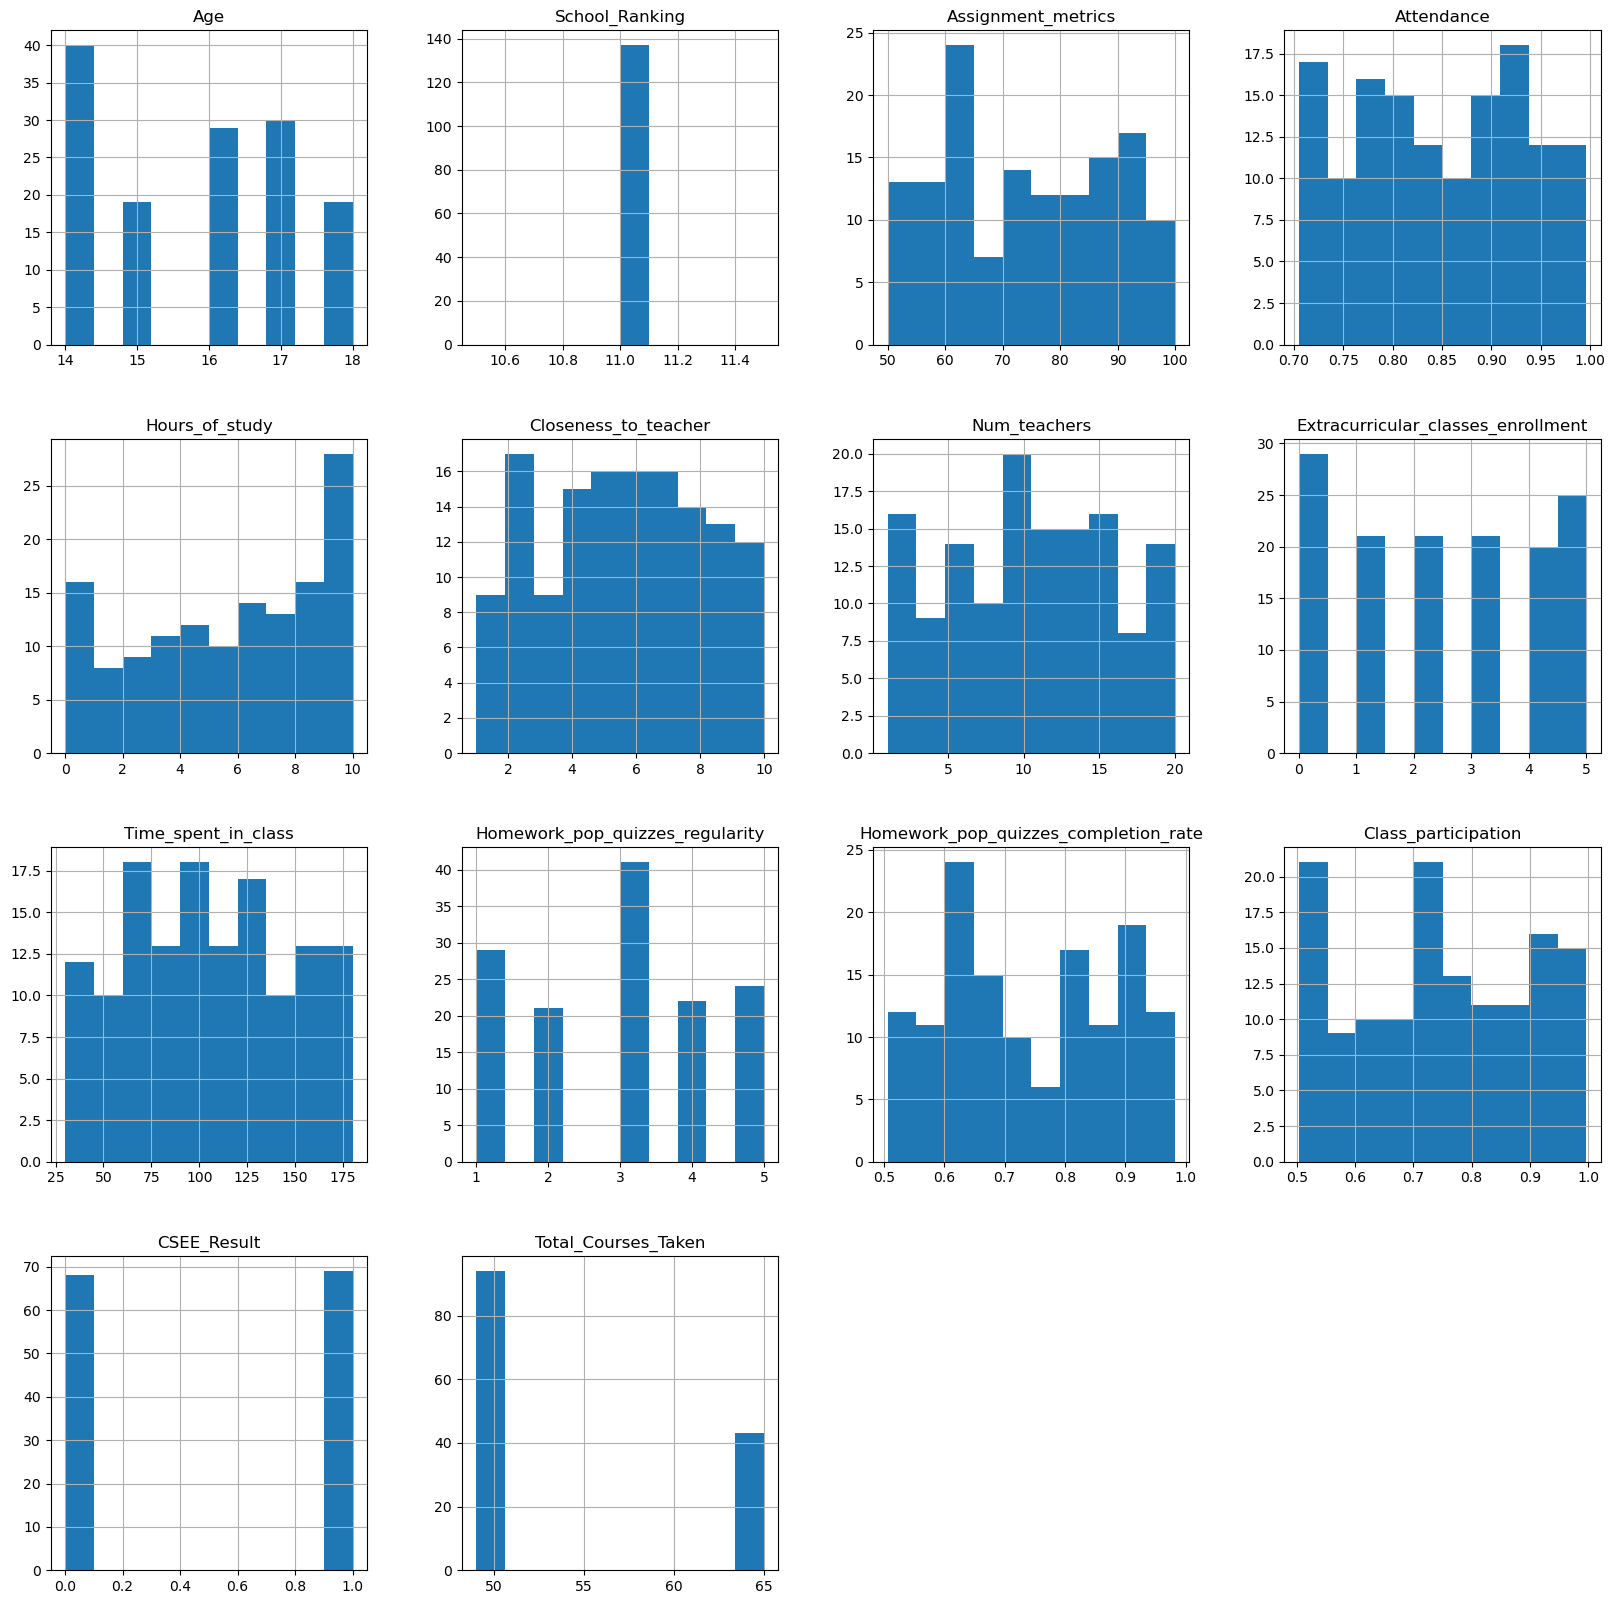

In [28]:
df_2.hist(figsize=(20,20))
plt.show()

1    0.50365
0    0.49635
Name: CSEE_Result, dtype: float64


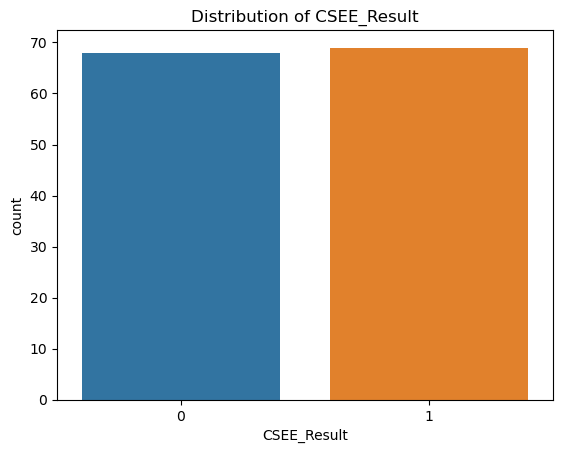

In [29]:
print(df_2['CSEE_Result' ].value_counts(normalize = True))
sns.countplot(x ='CSEE_Result', data = df_2)
plt.title('Distribution of CSEE_Result')
plt.show()

# DATA PREPROCESSING

In [30]:
cat=[col for col in df_2.columns if col not in ["CSEE_Result"]]

df_3= pd.get_dummies(data=df_2, columns=cat, dtype="int", drop_first=True)
df_3.head()


# data_df7= pd.get_dummies(data=data_df3, columns=[col for col in Details], dtype='int' , drop_first=True)
# data_df7.head()

,CSEE_Result,Gender_M,Age_15,Age_16,Age_17,Age_18,Gender_Orientation_Girls,Gender_Orientation_Mixed,Discipline_Commercial,Discipline_Science,Behavioual_record_good,Behavioual_record_poor,Access_to_textbooks_yes,Active_extracurricular_yes,Extracurricular_activities_music,Extracurricular_activities_none,Extracurricular_activities_sports,Access_to_curriculum_yes,Assignment_metrics_51,Assignment_metrics_52,Assignment_metrics_53,Assignment_metrics_55,Assignment_metrics_56,Assignment_metrics_58,Assignment_metrics_59,Assignment_metrics_60,Assignment_metrics_61,Assignment_metrics_62,Assignment_metrics_63,Assignment_metrics_64,Assignment_metrics_65,Assignment_metrics_66,Assignment_metrics_67,Assignment_metrics_68,Assignment_metrics_69,Assignment_metrics_70,Assignment_metrics_71,Assignment_metrics_72,Assignment_metrics_73,Assignment_metrics_74,Assignment_metrics_75,Assignment_metrics_76,Assignment_metrics_77,Assignment_metrics_79,Assignment_metrics_80,Assignment_metrics_81,Assignment_metrics_82,Assignment_metrics_83,Assignment_metrics_84,Assignment_metrics_85,Assignment_metrics_86,Assignment_metrics_87,Assignment_metrics_88,Assignment_metrics_89,Assignment_metrics_90,Assignment_metrics_91,Assignment_metrics_92,Assignment_metrics_93,Assignment_metrics_94,Assignment_metrics_95,Assignment_metrics_96,Assignment_metrics_97,Assignment_metrics_98,Assignment_metrics_99,Assignment_metrics_100,Attendance_0.7066568379359267,Attendance_0.7091495895938138,Attendance_0.7115164899528769,Attendance_0.7135087328465418,Attendance_0.7142255960338767,Attendance_0.7145880954346947,Attendance_0.7204293479936742,Attendance_0.7215785328222674,Attendance_0.7229024722800302,Attendance_0.723484793963618,Attendance_0.7261419341558958,Attendance_0.7309576088718531,Attendance_0.7328420596357934,Attendance_0.7329057282584328,Attendance_0.7336811143999309,...,4_Woodwork_D,4_Woodwork_F,4_Woodwork_Not_Taken,4_Metalwork_B,4_Metalwork_C,4_Metalwork_D,4_Metalwork_F,4_Metalwork_Not_Taken,4_Commerce_B,4_Commerce_C,4_Commerce_D,4_Commerce_F,4_Commerce_Not_Taken,4_Accounting_B,4_Accounting_C,4_Accounting_D,4_Accounting_F,4_Accounting_Not_Taken,4_Economics_B,4_Economics_C,4_Economics_D,4_Economics_F,4_Economics_Not_Taken,4_Government_B,4_Government_C,4_Government_D,4_Government_F,4_Government_Not_Taken,4_Biology.1_B,4_Biology.1_C,4_Biology.1_D,4_Biology.1_F,4_Biology.1_Not_Taken,4_Geography.1_B,4_Geography.1_C,4_Geography.1_D,4_Geography.1_F,4_Geography.1_Not_Taken,4_History_B,4_History_C,4_History_D,4_History_F,4_History_Not_Taken,4_Fine Arts_B,4_Fine Arts_C,4_Fine Arts_D,4_Fine Arts_F,4_Fine Arts_Not_Taken,4_Music_B,4_Music_C,4_Music_D,4_Music_F,4_Music_Not_Taken,4_Drama_B,4_Drama_C,4_Drama_D,4_Drama_F,4_Drama_Not_Taken,4_ICT_B,4_ICT_C,4_ICT_D,4_ICT_F,4_ICT_Not_Taken,4_French_B,4_French_C,4_French_D,4_French_F,4_French_Not_Taken,4_Arabic_B,4_Arabic_C,4_Arabic_D,4_Arabic_F,4_Arabic_Not_Taken,4_Literature in English_B,4_Literature in English_C,4_Literature in English_D,4_Literature in English_F,4_Literature in English_Not_Taken,Final_Grade_4_Pass,Total_Courses_Taken_65
0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,

# SCALING

In [31]:
#scaling
#Using min/max scalar
features = df_3.drop('CSEE_Result', axis=1)
target = df_3['CSEE_Result']
features.head()

,Gender_M,Age_15,Age_16,Age_17,Age_18,Gender_Orientation_Girls,Gender_Orientation_Mixed,Discipline_Commercial,Discipline_Science,Behavioual_record_good,Behavioual_record_poor,Access_to_textbooks_yes,Active_extracurricular_yes,Extracurricular_activities_music,Extracurricular_activities_none,Extracurricular_activities_sports,Access_to_curriculum_yes,Assignment_metrics_51,Assignment_metrics_52,Assignment_metrics_53,Assignment_metrics_55,Assignment_metrics_56,Assignment_metrics_58,Assignment_metrics_59,Assignment_metrics_60,Assignment_metrics_61,Assignment_metrics_62,Assignment_metrics_63,Assignment_metrics_64,Assignment_metrics_65,Assignment_metrics_66,Assignment_metrics_67,Assignment_metrics_68,Assignment_metrics_69,Assignment_metrics_70,Assignment_metrics_71,Assignment_metrics_72,Assignment_metrics_73,Assignment_metrics_74,Assignment_metrics_75,Assignment_metrics_76,Assignment_metrics_77,Assignment_metrics_79,Assignment_metrics_80,Assignment_metrics_81,Assignment_metrics_82,Assignment_metrics_83,Assignment_metrics_84,Assignment_metrics_85,Assignment_metrics_86,Assignment_metrics_87,Assignment_metrics_88,Assignment_metrics_89,Assignment_metrics_90,Assignment_metrics_91,Assignment_metrics_92,Assignment_metrics_93,Assignment_metrics_94,Assignment_metrics_95,Assignment_metrics_96,Assignment_metrics_97,Assignment_metrics_98,Assignment_metrics_99,Assignment_metrics_100,Attendance_0.7066568379359267,Attendance_0.7091495895938138,Attendance_0.7115164899528769,Attendance_0.7135087328465418,Attendance_0.7142255960338767,Attendance_0.7145880954346947,Attendance_0.7204293479936742,Attendance_0.7215785328222674,Attendance_0.7229024722800302,Attendance_0.723484793963618,Attendance_0.7261419341558958,Attendance_0.7309576088718531,Attendance_0.7328420596357934,Attendance_0.7329057282584328,Attendance_0.7336811143999309,Attendance_0.7340072075844037,...,4_Woodwork_D,4_Woodwork_F,4_Woodwork_Not_Taken,4_Metalwork_B,4_Metalwork_C,4_Metalwork_D,4_Metalwork_F,4_Metalwork_Not_Taken,4_Commerce_B,4_Commerce_C,4_Commerce_D,4_Commerce_F,4_Commerce_Not_Taken,4_Accounting_B,4_Accounting_C,4_Accounting_D,4_Accounting_F,4_Accounting_Not_Taken,4_Economics_B,4_Economics_C,4_Economics_D,4_Economics_F,4_Economics_Not_Taken,4_Government_B,4_Government_C,4_Government_D,4_Government_F,4_Government_Not_Taken,4_Biology.1_B,4_Biology.1_C,4_Biology.1_D,4_Biology.1_F,4_Biology.1_Not_Taken,4_Geography.1_B,4_Geography.1_C,4_Geography.1_D,4_Geography.1_F,4_Geography.1_Not_Taken,4_History_B,4_History_C,4_History_D,4_History_F,4_History_Not_Taken,4_Fine Arts_B,4_Fine Arts_C,4_Fine Arts_D,4_Fine Arts_F,4_Fine Arts_Not_Taken,4_Music_B,4_Music_C,4_Music_D,4_Music_F,4_Music_Not_Taken,4_Drama_B,4_Drama_C,4_Drama_D,4_Drama_F,4_Drama_Not_Taken,4_ICT_B,4_ICT_C,4_ICT_D,4_ICT_F,4_ICT_Not_Taken,4_French_B,4_French_C,4_French_D,4_French_F,4_French_Not_Taken,4_Arabic_B,4_Arabic_C,4_Arabic_D,4_Arabic_F,4_Arabic_Not_Taken,4_Literature in English_B,4_Literature in English_C,4_Literature in English_D,4_Literature in English_F,4_Literature in English_Not_Taken,Final_Grade_4_Pass,Total_Courses_Taken_65
0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [32]:
#import library
from sklearn.preprocessing import MinMaxScaler

In [33]:
#To instantiate ie
scaler = MinMaxScaler(feature_range = (0,1))
rescaled_features = scaler.fit_transform(features)
print(rescaled_features)

[[0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]]


In [34]:
#To convert to a dataframe
rescaled_features = pd.DataFrame(rescaled_features, columns=features.columns)
rescaled_features.head()

,Gender_M,Age_15,Age_16,Age_17,Age_18,Gender_Orientation_Girls,Gender_Orientation_Mixed,Discipline_Commercial,Discipline_Science,Behavioual_record_good,Behavioual_record_poor,Access_to_textbooks_yes,Active_extracurricular_yes,Extracurricular_activities_music,Extracurricular_activities_none,Extracurricular_activities_sports,Access_to_curriculum_yes,Assignment_metrics_51,Assignment_metrics_52,Assignment_metrics_53,Assignment_metrics_55,Assignment_metrics_56,Assignment_metrics_58,Assignment_metrics_59,Assignment_metrics_60,Assignment_metrics_61,Assignment_metrics_62,Assignment_metrics_63,Assignment_metrics_64,Assignment_metrics_65,Assignment_metrics_66,Assignment_metrics_67,Assignment_metrics_68,Assignment_metrics_69,Assignment_metrics_70,Assignment_metrics_71,Assignment_metrics_72,Assignment_metrics_73,Assignment_metrics_74,Assignment_metrics_75,Assignment_metrics_76,Assignment_metrics_77,Assignment_metrics_79,Assignment_metrics_80,Assignment_metrics_81,Assignment_metrics_82,Assignment_metrics_83,Assignment_metrics_84,Assignment_metrics_85,Assignment_metrics_86,Assignment_metrics_87,Assignment_metrics_88,Assignment_metrics_89,Assignment_metrics_90,Assignment_metrics_91,Assignment_metrics_92,Assignment_metrics_93,Assignment_metrics_94,Assignment_metrics_95,Assignment_metrics_96,Assignment_metrics_97,Assignment_metrics_98,Assignment_metrics_99,Assignment_metrics_100,Attendance_0.7066568379359267,Attendance_0.7091495895938138,Attendance_0.7115164899528769,Attendance_0.7135087328465418,Attendance_0.7142255960338767,Attendance_0.7145880954346947,Attendance_0.7204293479936742,Attendance_0.7215785328222674,Attendance_0.7229024722800302,Attendance_0.723484793963618,Attendance_0.7261419341558958,Attendance_0.7309576088718531,Attendance_0.7328420596357934,Attendance_0.7329057282584328,Attendance_0.7336811143999309,Attendance_0.7340072075844037,...,4_Woodwork_D,4_Woodwork_F,4_Woodwork_Not_Taken,4_Metalwork_B,4_Metalwork_C,4_Metalwork_D,4_Metalwork_F,4_Metalwork_Not_Taken,4_Commerce_B,4_Commerce_C,4_Commerce_D,4_Commerce_F,4_Commerce_Not_Taken,4_Accounting_B,4_Accounting_C,4_Accounting_D,4_Accounting_F,4_Accounting_Not_Taken,4_Economics_B,4_Economics_C,4_Economics_D,4_Economics_F,4_Economics_Not_Taken,4_Government_B,4_Government_C,4_Government_D,4_Government_F,4_Government_Not_Taken,4_Biology.1_B,4_Biology.1_C,4_Biology.1_D,4_Biology.1_F,4_Biology.1_Not_Taken,4_Geography.1_B,4_Geography.1_C,4_Geography.1_D,4_Geography.1_F,4_Geography.1_Not_Taken,4_History_B,4_History_C,4_History_D,4_History_F,4_History_Not_Taken,4_Fine Arts_B,4_Fine Arts_C,4_Fine Arts_D,4_Fine Arts_F,4_Fine Arts_Not_Taken,4_Music_B,4_Music_C,4_Music_D,4_Music_F,4_Music_Not_Taken,4_Drama_B,4_Drama_C,4_Drama_D,4_Drama_F,4_Drama_Not_Taken,4_ICT_B,4_ICT_C,4_ICT_D,4_ICT_F,4_ICT_Not_Taken,4_French_B,4_French_C,4_French_D,4_French_F,4_French_Not_Taken,4_Arabic_B,4_Arabic_C,4_Arabic_D,4_Arabic_F,4_Arabic_Not_Taken,4_Literature in English_B,4_Literature in English_C,4_Literature in English_D,4_Literature in English_F,4_Literature in English_Not_Taken,Final_Grade_4_Pass,Total_Courses_Taken_65
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [35]:
rescaled_features.describe()

,Gender_M,Age_15,Age_16,Age_17,Age_18,Gender_Orientation_Girls,Gender_Orientation_Mixed,Discipline_Commercial,Discipline_Science,Behavioual_record_good,Behavioual_record_poor,Access_to_textbooks_yes,Active_extracurricular_yes,Extracurricular_activities_music,Extracurricular_activities_none,Extracurricular_activities_sports,Access_to_curriculum_yes,Assignment_metrics_51,Assignment_metrics_52,Assignment_metrics_53,Assignment_metrics_55,Assignment_metrics_56,Assignment_metrics_58,Assignment_metrics_59,Assignment_metrics_60,Assignment_metrics_61,Assignment_metrics_62,Assignment_metrics_63,Assignment_metrics_64,Assignment_metrics_65,Assignment_metrics_66,Assignment_metrics_67,Assignment_metrics_68,Assignment_metrics_69,Assignment_metrics_70,Assignment_metrics_71,Assignment_metrics_72,Assignment_metrics_73,Assignment_metrics_74,Assignment_metrics_75,Assignment_metrics_76,Assignment_metrics_77,Assignment_metrics_79,Assignment_metrics_80,Assignment_metrics_81,Assignment_metrics_82,Assignment_metrics_83,Assignment_metrics_84,Assignment_metrics_85,Assignment_metrics_86,Assignment_metrics_87,Assignment_metrics_88,Assignment_metrics_89,Assignment_metrics_90,Assignment_metrics_91,Assignment_metrics_92,Assignment_metrics_93,Assignment_metrics_94,Assignment_metrics_95,Assignment_metrics_96,Assignment_metrics_97,Assignment_metrics_98,Assignment_metrics_99,Assignment_metrics_100,Attendance_0.7066568379359267,Attendance_0.7091495895938138,Attendance_0.7115164899528769,Attendance_0.7135087328465418,Attendance_0.7142255960338767,Attendance_0.7145880954346947,Attendance_0.7204293479936742,Attendance_0.7215785328222674,Attendance_0.7229024722800302,Attendance_0.723484793963618,Attendance_0.7261419341558958,Attendance_0.7309576088718531,Attendance_0.7328420596357934,Attendance_0.7329057282584328,Attendance_0.7336811143999309,Attendance_0.7340072075844037,...,4_Woodwork_D,4_Woodwork_F,4_Woodwork_Not_Taken,4_Metalwork_B,4_Metalwork_C,4_Metalwork_D,4_Metalwork_F,4_Metalwork_Not_Taken,4_Commerce_B,4_Commerce_C,4_Commerce_D,4_Commerce_F,4_Commerce_Not_Taken,4_Accounting_B,4_Accounting_C,4_Accounting_D,4_Accounting_F,4_Accounting_Not_Taken,4_Economics_B,4_Economics_C,4_Economics_D,4_Economics_F,4_Economics_Not_Taken,4_Government_B,4_Government_C,4_Government_D,4_Government_F,4_Government_Not_Taken,4_Biology.1_B,4_Biology.1_C,4_Biology.1_D,4_Biology.1_F,4_Biology.1_Not_Taken,4_Geography.1_B,4_Geography.1_C,4_Geography.1_D,4_Geography.1_F,4_Geography.1_Not_Taken,4_History_B,4_History_C,4_History_D,4_History_F,4_History_Not_Taken,4_Fine Arts_B,4_Fine Arts_C,4_Fine Arts_D,4_Fine Arts_F,4_Fine Arts_Not_Taken,4_Music_B,4_Music_C,4_Music_D,4_Music_F,4_Music_Not_Taken,4_Drama_B,4_Drama_C,4_Drama_D,4_Drama_F,4_Drama_Not_Taken,4_ICT_B,4_ICT_C,4_ICT_D,4_ICT_F,4_ICT_Not_Taken,4_French_B,4_French_C,4_French_D,4_French_F,4_French_Not_Taken,4_Arabic_B,4_Arabic_C,4_Arabic_D,4_Arabic_F,4_Arabic_Not_Taken,4_Literature in English_B,4_Literature in English_C,4_Literature in English_D,4_Literature in English_F,4_Literature in English_Not_Taken,Final_Grade_4_Pass,Total_Courses_Taken_65
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000

# MACHINE LEARNING

In [36]:
## To split into train and test dataset
x=features
y=target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=41)

In [37]:
x_train.shape

(102, 1167)

In [38]:
x_test.shape

(35, 1167)

In [39]:
y_train.shape

(102,)

In [40]:
y_test.shape

(35,)

In [41]:
x_train.head()

,Gender_M,Age_15,Age_16,Age_17,Age_18,Gender_Orientation_Girls,Gender_Orientation_Mixed,Discipline_Commercial,Discipline_Science,Behavioual_record_good,Behavioual_record_poor,Access_to_textbooks_yes,Active_extracurricular_yes,Extracurricular_activities_music,Extracurricular_activities_none,Extracurricular_activities_sports,Access_to_curriculum_yes,Assignment_metrics_51,Assignment_metrics_52,Assignment_metrics_53,Assignment_metrics_55,Assignment_metrics_56,Assignment_metrics_58,Assignment_metrics_59,Assignment_metrics_60,Assignment_metrics_61,Assignment_metrics_62,Assignment_metrics_63,Assignment_metrics_64,Assignment_metrics_65,Assignment_metrics_66,Assignment_metrics_67,Assignment_metrics_68,Assignment_metrics_69,Assignment_metrics_70,Assignment_metrics_71,Assignment_metrics_72,Assignment_metrics_73,Assignment_metrics_74,Assignment_metrics_75,Assignment_metrics_76,Assignment_metrics_77,Assignment_metrics_79,Assignment_metrics_80,Assignment_metrics_81,Assignment_metrics_82,Assignment_metrics_83,Assignment_metrics_84,Assignment_metrics_85,Assignment_metrics_86,Assignment_metrics_87,Assignment_metrics_88,Assignment_metrics_89,Assignment_metrics_90,Assignment_metrics_91,Assignment_metrics_92,Assignment_metrics_93,Assignment_metrics_94,Assignment_metrics_95,Assignment_metrics_96,Assignment_metrics_97,Assignment_metrics_98,Assignment_metrics_99,Assignment_metrics_100,Attendance_0.7066568379359267,Attendance_0.7091495895938138,Attendance_0.7115164899528769,Attendance_0.7135087328465418,Attendance_0.7142255960338767,Attendance_0.7145880954346947,Attendance_0.7204293479936742,Attendance_0.7215785328222674,Attendance_0.7229024722800302,Attendance_0.723484793963618,Attendance_0.7261419341558958,Attendance_0.7309576088718531,Attendance_0.7328420596357934,Attendance_0.7329057282584328,Attendance_0.7336811143999309,Attendance_0.7340072075844037,...,4_Woodwork_D,4_Woodwork_F,4_Woodwork_Not_Taken,4_Metalwork_B,4_Metalwork_C,4_Metalwork_D,4_Metalwork_F,4_Metalwork_Not_Taken,4_Commerce_B,4_Commerce_C,4_Commerce_D,4_Commerce_F,4_Commerce_Not_Taken,4_Accounting_B,4_Accounting_C,4_Accounting_D,4_Accounting_F,4_Accounting_Not_Taken,4_Economics_B,4_Economics_C,4_Economics_D,4_Economics_F,4_Economics_Not_Taken,4_Government_B,4_Government_C,4_Government_D,4_Government_F,4_Government_Not_Taken,4_Biology.1_B,4_Biology.1_C,4_Biology.1_D,4_Biology.1_F,4_Biology.1_Not_Taken,4_Geography.1_B,4_Geography.1_C,4_Geography.1_D,4_Geography.1_F,4_Geography.1_Not_Taken,4_History_B,4_History_C,4_History_D,4_History_F,4_History_Not_Taken,4_Fine Arts_B,4_Fine Arts_C,4_Fine Arts_D,4_Fine Arts_F,4_Fine Arts_Not_Taken,4_Music_B,4_Music_C,4_Music_D,4_Music_F,4_Music_Not_Taken,4_Drama_B,4_Drama_C,4_Drama_D,4_Drama_F,4_Drama_Not_Taken,4_ICT_B,4_ICT_C,4_ICT_D,4_ICT_F,4_ICT_Not_Taken,4_French_B,4_French_C,4_French_D,4_French_F,4_French_Not_Taken,4_Arabic_B,4_Arabic_C,4_Arabic_D,4_Arabic_F,4_Arabic_Not_Taken,4_Literature in English_B,4_Literature in English_C,4_Literature in English_D,4_Literature in English_F,4_Literature in English_Not_Taken,Final_Grade_4_Pass,Total_Courses_Taken_65
9,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
106,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
16,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0

In [42]:
y_train.head()

9      1
106    0
16     0
64     1
25     0
Name: CSEE_Result, dtype: int64

In [43]:
x_test.head()

,Gender_M,Age_15,Age_16,Age_17,Age_18,Gender_Orientation_Girls,Gender_Orientation_Mixed,Discipline_Commercial,Discipline_Science,Behavioual_record_good,Behavioual_record_poor,Access_to_textbooks_yes,Active_extracurricular_yes,Extracurricular_activities_music,Extracurricular_activities_none,Extracurricular_activities_sports,Access_to_curriculum_yes,Assignment_metrics_51,Assignment_metrics_52,Assignment_metrics_53,Assignment_metrics_55,Assignment_metrics_56,Assignment_metrics_58,Assignment_metrics_59,Assignment_metrics_60,Assignment_metrics_61,Assignment_metrics_62,Assignment_metrics_63,Assignment_metrics_64,Assignment_metrics_65,Assignment_metrics_66,Assignment_metrics_67,Assignment_metrics_68,Assignment_metrics_69,Assignment_metrics_70,Assignment_metrics_71,Assignment_metrics_72,Assignment_metrics_73,Assignment_metrics_74,Assignment_metrics_75,Assignment_metrics_76,Assignment_metrics_77,Assignment_metrics_79,Assignment_metrics_80,Assignment_metrics_81,Assignment_metrics_82,Assignment_metrics_83,Assignment_metrics_84,Assignment_metrics_85,Assignment_metrics_86,Assignment_metrics_87,Assignment_metrics_88,Assignment_metrics_89,Assignment_metrics_90,Assignment_metrics_91,Assignment_metrics_92,Assignment_metrics_93,Assignment_metrics_94,Assignment_metrics_95,Assignment_metrics_96,Assignment_metrics_97,Assignment_metrics_98,Assignment_metrics_99,Assignment_metrics_100,Attendance_0.7066568379359267,Attendance_0.7091495895938138,Attendance_0.7115164899528769,Attendance_0.7135087328465418,Attendance_0.7142255960338767,Attendance_0.7145880954346947,Attendance_0.7204293479936742,Attendance_0.7215785328222674,Attendance_0.7229024722800302,Attendance_0.723484793963618,Attendance_0.7261419341558958,Attendance_0.7309576088718531,Attendance_0.7328420596357934,Attendance_0.7329057282584328,Attendance_0.7336811143999309,Attendance_0.7340072075844037,...,4_Woodwork_D,4_Woodwork_F,4_Woodwork_Not_Taken,4_Metalwork_B,4_Metalwork_C,4_Metalwork_D,4_Metalwork_F,4_Metalwork_Not_Taken,4_Commerce_B,4_Commerce_C,4_Commerce_D,4_Commerce_F,4_Commerce_Not_Taken,4_Accounting_B,4_Accounting_C,4_Accounting_D,4_Accounting_F,4_Accounting_Not_Taken,4_Economics_B,4_Economics_C,4_Economics_D,4_Economics_F,4_Economics_Not_Taken,4_Government_B,4_Government_C,4_Government_D,4_Government_F,4_Government_Not_Taken,4_Biology.1_B,4_Biology.1_C,4_Biology.1_D,4_Biology.1_F,4_Biology.1_Not_Taken,4_Geography.1_B,4_Geography.1_C,4_Geography.1_D,4_Geography.1_F,4_Geography.1_Not_Taken,4_History_B,4_History_C,4_History_D,4_History_F,4_History_Not_Taken,4_Fine Arts_B,4_Fine Arts_C,4_Fine Arts_D,4_Fine Arts_F,4_Fine Arts_Not_Taken,4_Music_B,4_Music_C,4_Music_D,4_Music_F,4_Music_Not_Taken,4_Drama_B,4_Drama_C,4_Drama_D,4_Drama_F,4_Drama_Not_Taken,4_ICT_B,4_ICT_C,4_ICT_D,4_ICT_F,4_ICT_Not_Taken,4_French_B,4_French_C,4_French_D,4_French_F,4_French_Not_Taken,4_Arabic_B,4_Arabic_C,4_Arabic_D,4_Arabic_F,4_Arabic_Not_Taken,4_Literature in English_B,4_Literature in English_C,4_Literature in English_D,4_Literature in English_F,4_Literature in English_Not_Taken,Final_Grade_4_Pass,Total_Courses_Taken_65
96,1,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
43,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
14,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0

In [44]:
y_test.head()

96    0
43    1
14    1
37    0
30    1
Name: CSEE_Result, dtype: int64

# MACHINE LEARNING MODEL

## Random Forest Classifier

### Strengths of Random Forest Classifier

1. **Accuracy**: Generally provides high predictive accuracy.
2. **Robustness**: Resistant to overfitting due to ensemble of trees.
3. **Non-Linear Relationships**: Captures complex, non-linear relationships.
4. **Feature Importance**: Offers insights into feature importance.
5. **Handles Missing Data**: Can handle missing values effectively.

### Weaknesses of Random Forest Classifier

1. **Complexity**: Less interpretable than single decision trees.
2. **Computationally Intensive**: Requires more computational resources.
3. **Slow Prediction**: Slower predictions compared to simpler models.
4. **Overfitting with Too Many Trees**: Can overfit with an excessive number of trees.
5. **Memory Usage**: Consumes more memory due to multiple trees.

### Effectiveness of Random Forest Classifier

1. **High Accuracy**: Preferred when high predictive accuracy is required.
2. Robustness to Overfitting: Effective for preventing overfitting in complex datasets.
3. Feature Importance: Useful for understanding feature significance.
4. Handling Missing Data: Suitable for datasets with missing values.
5. Non-Linear Data: Works well with datasets having complex relationships.

In [45]:
#Building model
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier

#To instatiate the model
rf = RandomForestClassifier(max_depth=4,n_estimators=200)

#To train the model with train dataset
model_rf =%time rf.fit(x_train, y_train)

CPU times: total: 344 ms
Wall time: 340 ms


In [46]:
rf.score(x_train, y_train)

0.9901960784313726

In [47]:
rf.score(x_test, y_test)

0.5428571428571428

### Model Evaluation and Performance

In [48]:
#To predict
y_pred_rf = rf.predict(x_test)

#importing metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#To calculate and view accuracy score for RandomForestClassifier


print ('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)*100))
print ('\n Random Forest Model precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_rf)*100))
print ('\n Random Forest Model recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_rf)*100))
print ('\n Random Forest Model f1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_rf)*100))

Random Forest Model accuracy score: 54.2857

 Random Forest Model precision score: 72.7273

 Random Forest Model recall score: 38.0952

 Random Forest Model f1 score: 50.0000


### Confusion Matrix

In [49]:
#confustion metrics
cm_rf=confusion_matrix(y_test, y_pred_rf)

print('confusion matrix\n\n', cm_rf)
print ('\n True positive (TP) =', cm_rf[1,1])
print ('\n True negative (TN) =', cm_rf[0,0])
print ('\n False positive (FP) =', cm_rf[0,1])
print ('\n False negetive (FN) =', cm_rf[1,0])

confusion matrix

 [[11  3]
 [13  8]]

 True positive (TP) = 8

 True negative (TN) = 11

 False positive (FP) = 3

 False negetive (FN) = 13


### Heatmap Visualization

<Axes: >

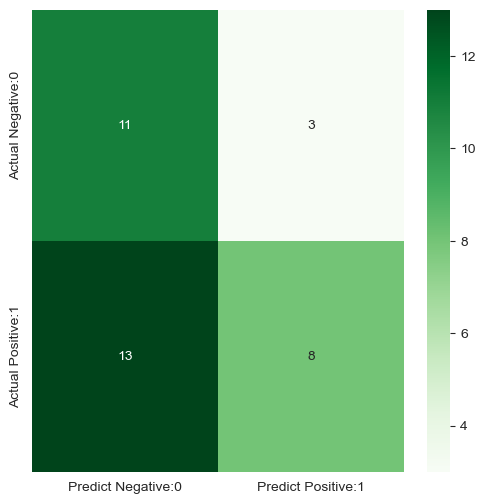

In [50]:
#To Visualize it using heatmap
plt.figure(figsize = (6,6))
sns.set_style('darkgrid')
cm_rf_matrix=pd.DataFrame(data=cm_rf, columns= ['Predict Negative:0', 'Predict Positive:1'], index= ['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_rf_matrix, annot=True, fmt='d', cmap = plt.cm.Greens)

### Classification Report

In [51]:
#To do a classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.46      0.79      0.58        14
           1       0.73      0.38      0.50        21

    accuracy                           0.54        35
   macro avg       0.59      0.58      0.54        35
weighted avg       0.62      0.54      0.53        35



### Receiver Operating Characteristic (ROC CURVE)

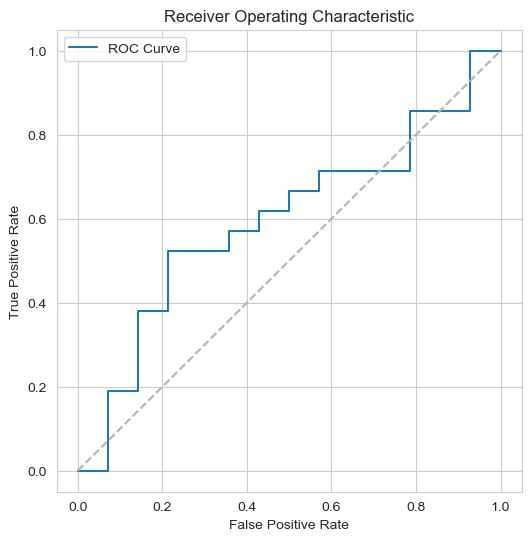

In [52]:
# Get predicted probabilities
y_probabilities = model_rf.predict_proba(x_test)[:, 1]

# Create true positive and false positive rates
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)

# Plot ROC Curve
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle="--", color=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc='best')
plt.show()


# Decision Tree Classifier

### Strengths of Decision Tree Classifier

1. **Simple and Intuitive**: Easy to visualize and interpret.
2. **Non-Linear Relationships**: Handles non-linear relationships well.
3. **Handles Various Data Types**: Works with numerical and categorical data.
4. **Feature Importance**: Highlights the most important features.
5. **No Need for Data Scaling**: Performs well without requiring feature scaling or normalization.

### Weaknesses of Decision Tree Classifier

1. **Overfitting**: Prone to overfitting, especially with deep trees.
2. **Unstable**: Small data changes can lead to different trees.
3. **Bias**: Can be biased towards features with more levels.
4. **Complexity**: Large trees can become complex and hard to interpret.
5. **Poor Performance with Small Data**: Less effective with small datasets.

### Effectiveness of Decision Tree Classifier

1. **Easy Interpretation**: Ideal when interpretability is crucial.
2. **Handling Non-Linear Data**: Suitable for complex, non-linear relationships.
3. **Feature Selection**: Useful for identifying important features.
4. **Mixed Data Types**: Effective with numerical and categorical features.
5. **Quick Prototyping**: Good for initial exploratory data analysis.

In [53]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

#To instatiate the model
dc = DecisionTreeClassifier()

#To train the model with train dataset
model_dc =%time dc.fit(x_train, y_train)

CPU times: total: 15.6 ms
Wall time: 18.9 ms


In [54]:
y_pred_dc=model_dc.predict(x_test)

### Model Evaluation and Performance 

In [55]:
#To calculate and view accuracy score for DecisionTreeClassifier

print ('Decision Tree Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_dc)*100))
print ('\n Decision Tree Classifier precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_dc)*100))
print ('\n Decision Tree Classifier recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_dc)*100))
print ('\n RDecision Tree Classifier f1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_dc)*100))

Decision Tree Classifier accuracy score: 54.2857

 Decision Tree Classifier precision score: 69.2308

 Decision Tree Classifier recall score: 42.8571

 RDecision Tree Classifier f1 score: 52.9412


### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm_dc = confusion_matrix(y_test, y_pred_dc)

# Print the confusion matrix and its components
print('Confusion Matrix\n\n', cm_dc)
print('\nTrue Positive (TP) =', cm_dc[1, 1])
print('\nTrue Negative (TN) =', cm_dc[0, 0])
print('\nFalse Positive (FP) =', cm_dc[0, 1])
print('\nFalse Negative (FN) =', cm_dc[1, 0])


Confusion Matrix

 [[10  4]
 [12  9]]

True Positive (TP) = 9

True Negative (TN) = 10

False Positive (FP) = 4

False Negative (FN) = 12


<Axes: >

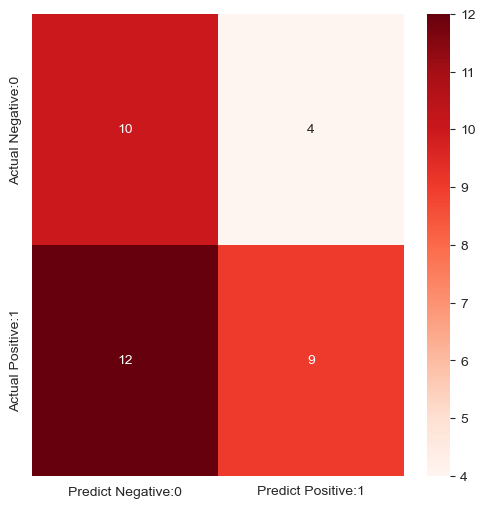

In [57]:
#To Visualize it using heatmap
plt.figure(figsize = (6,6))
sns.set_style('darkgrid')
cm_dc_matrix=pd.DataFrame(data=cm_dc, columns= ['Predict Negative:0', 'Predict Positive:1'], index= ['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_dc_matrix, annot=True, fmt='d', cmap = plt.cm.Reds)

### Classification Report

In [58]:
#To to a classification report
print(classification_report(y_test, y_pred_dc))

              precision    recall  f1-score   support

           0       0.45      0.71      0.56        14
           1       0.69      0.43      0.53        21

    accuracy                           0.54        35
   macro avg       0.57      0.57      0.54        35
weighted avg       0.60      0.54      0.54        35



### Receiver Operating Characteristic (ROC CURVE)

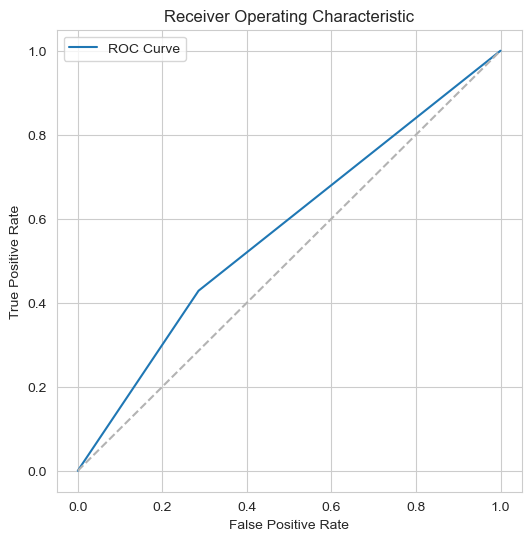

In [59]:
# Get predicted probabilities
y_probabilities = model_dc.predict_proba(x_test)[:, 1]

# Create true positive and false positive rates
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)

# Plot ROC Curve
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle="--", color=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc='best')
plt.show()

# Gradient Boosting Classifier

### Strengths of Gradient Boosting Classifier

1. **High Accuracy**: Often delivers state-of-the-art predictive performance.
2. **Handles Non-Linearities**: Effective for complex, non-linear relationships.
3. **Flexibility**: Can be fine-tuned with various hyperparameters.
4. **Feature Importance**: Provides insights into the importance of features.
5. **Ensemble Learning**: Combines multiple weak learners to improve performance.

### Weaknesses of Gradient Boosting Classifier

1. **Overfitting**: Prone to overfitting if not properly tuned.
2. **Computationally Intensive**: Requires significant computational resources.
3. **Slow Training**: Can be slow to train, especially with large datasets.
4. **Complexity**: More complex and harder to interpret than simpler models.
5. **Sensitive to Hyperparameters**: Performance heavily depends on hyperparameter tuning.

# Effectiveness of Gradient Boosting Classifier


1. **High Predictive Performance**: Ideal for applications requiring high accuracy.
2. **Complex Relationships**: Effective for datasets with non-linear and complex patterns.
3. **Feature Importance**: Useful for identifying and understanding important features.
4. **Fine-Tuning**: Suitable when extensive hyperparameter tuning is possible.
5. **Ensemble Methods**: Beneficial when leveraging ensemble learning to improve model robustness.

In [61]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# To instantiate the model
gbc = GradientBoostingClassifier(max_depth=4)

# To train the model with the train dataset
%time model_gbc = gbc.fit(x_train, y_train)

CPU times: total: 562 ms
Wall time: 551 ms


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred_gbc = gbc.predict(x_test)

# Calculate and print the scores
print('Gradient Boosting Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gbc) * 100))
print('Gradient Boosting Classifier precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_gbc) * 100))
print('Gradient Boosting Classifier recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_gbc) * 100))
print('Gradient Boosting Classifier F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_gbc) * 100))

Gradient Boosting Classifier accuracy score: 54.2857
Gradient Boosting Classifier precision score: 69.2308
Gradient Boosting Classifier recall score: 42.8571
Gradient Boosting Classifier F1 score: 52.9412


### Confusion Matrix

In [63]:
# Calculate the confusion matrix
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

# Print the confusion matrix and its components
print('Confusion Matrix\n\n', cm_gbc)
print('\nTrue Positive (TP) =', cm_gbc[1, 1])
print('\nTrue Negative (TN) =', cm_gbc[0, 0])
print('\nFalse Positive (FP) =', cm_gbc[0, 1])
print('\nFalse Negative (FN) =', cm_gbc[1, 0])

Confusion Matrix

 [[10  4]
 [12  9]]

True Positive (TP) = 9

True Negative (TN) = 10

False Positive (FP) = 4

False Negative (FN) = 12


### Heatmap Visualization

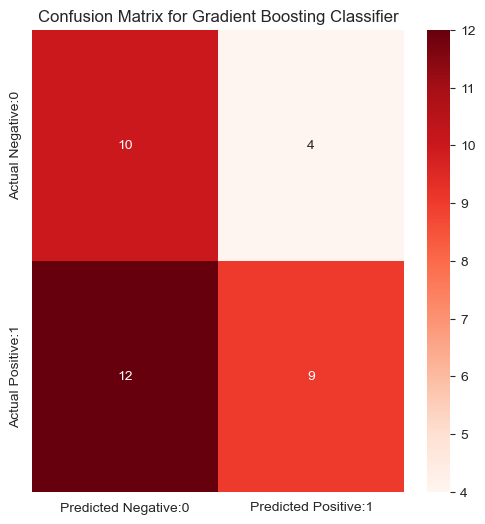

In [64]:
# Visualize the confusion matrix using heatmap
plt.figure(figsize=(6, 6))
sns.set_style('darkgrid')
cm_gbc_matrix = pd.DataFrame(data=cm_gbc, columns=['Predicted Negative:0', 'Predicted Positive:1'], index=['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_gbc_matrix, annot=True, fmt='d', cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### Classification Report

In [65]:
#To to a classification report
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.45      0.71      0.56        14
           1       0.69      0.43      0.53        21

    accuracy                           0.54        35
   macro avg       0.57      0.57      0.54        35
weighted avg       0.60      0.54      0.54        35



### Receiver Operating Characteristic  (ROC CURVE)

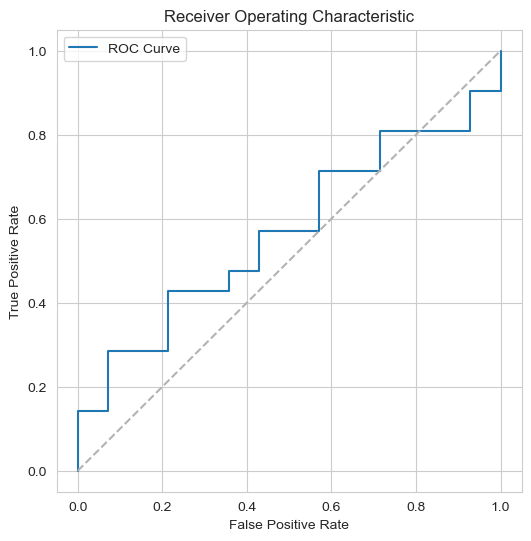

In [66]:

# Create true positive and false positive rates
from sklearn.metrics import roc_curve
# Get predicted probabilities
y_probabilities = model_gbc.predict_proba(x_test)[:, 1]

# Create true positive and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle="--", color=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc='best')
plt.show()